# Clustering w/ KMeans

Also referred as segmentation analysis, clustering attempts to relate groupings or collection of data into into subsets where in each subset or "cluster" the data is closely related to one another. The choice of distance and dissimilarity between subsets or groupings is foundamental to all clustering methods. Dissimilarties, which is based on the squared distance, is equivalent to clustering based on correlation (i.e. similarity).So the main objective of clustering is to partition the data into groups such that the pairwise dissimiarities between the groups is minimal compared to those in different clusters. 

Commonly used in data mining, KMeans, is an iterative process and aims to partition 'N' observations into 'K' where observation belongs to the cluster with the closest mean. By assigning 'N' observations to 'K' clusters such that within each the average dissimilarity of the observations from the cluster mean (i.e. centroid) is minimized. The equation below, or also known as the inertia (i.e. within-cluster sum squared criterion) is to be minimized


$$ Minimize = \sum_{k=1}^{k}\sum_{C(i)=k}^{k}||(x_{i}-\bar{x_{k}})||^{2}$$

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import pairwise, calinski_harabaz_score,silhouette_score
from sklearn.datasets import make_blobs,make_moons
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

### Exploring Cluster Similarity

- First generate random dataset with three clusters
- Perform KMeans Clustering to obtain cluster labels
- Compute Euclidean Distance (pairwise)
- Transform distance to similarity 
- Note: a pairwise distance can be converted into a similarity value using the inverse, monotonic relationship such as: $s = \frac{1}{1+d}$

In [2]:
def get_blobs(n,std):
    centers = [[1, 1], [0, 1], [0,0]]
    blobs = make_blobs(n_samples = n,centers = centers,cluster_std=std)
    return(blobs)

def km_clustering(X,n_clusters):
    
    km = KMeans(n_clusters=n_clusters,n_init=100,random_state=1)
    km.fit(X)
    labels = km.labels_ 
    
    #Add Cluster Labels to Dataset
    X = np.column_stack([X,labels])
    
    #Clusters and Similarity Matrix Visual
    similarity_matrix(km,X,labels)

def similarity_matrix(clusterer,X,labels):
        
    #Set up Grid plots
    fig = plt.figure(figsize=(14,6))
    layout = (1,2)
    ax = plt.subplot2grid(layout,(0,0))
    ax1 = plt.subplot2grid(layout,(0,1))
    
    #Plot X1 and X2 Variables
    ax.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow')
    
    #Plot Centroids of Clusters
    unique_clusters = len(np.unique(labels))
    ax.scatter(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,1],c=np.arange(0,unique_clusters),cmap='rainbow',marker='p',s=200)
  
    #Compute Similarity
    x = pd.DataFrame(X).sort_values(2)#Convert X to dataframe and sort cluster labels column index
    euclidean = pairwise.euclidean_distances(x.ix[:,:1])
    s = 1 / (1+euclidean) #transform distance to similarity

    #Matrix Plot
    mesh = ax1.pcolormesh(s,cmap='autumn_r',alpha=0.50)
    
    #Axis Constraints
    ax1.set_ylim(len(s),0)
    
    #Colorbar 
    fig.colorbar(mesh)
    
    #Set Titles
    ax.set_title('{} -- {} Clusters'.format(clusterer.__class__.__name__,unique_clusters),fontsize=16,y=1.02)
    ax1.set_title('Similarity Matrix',fontsize=20,y=1.02)

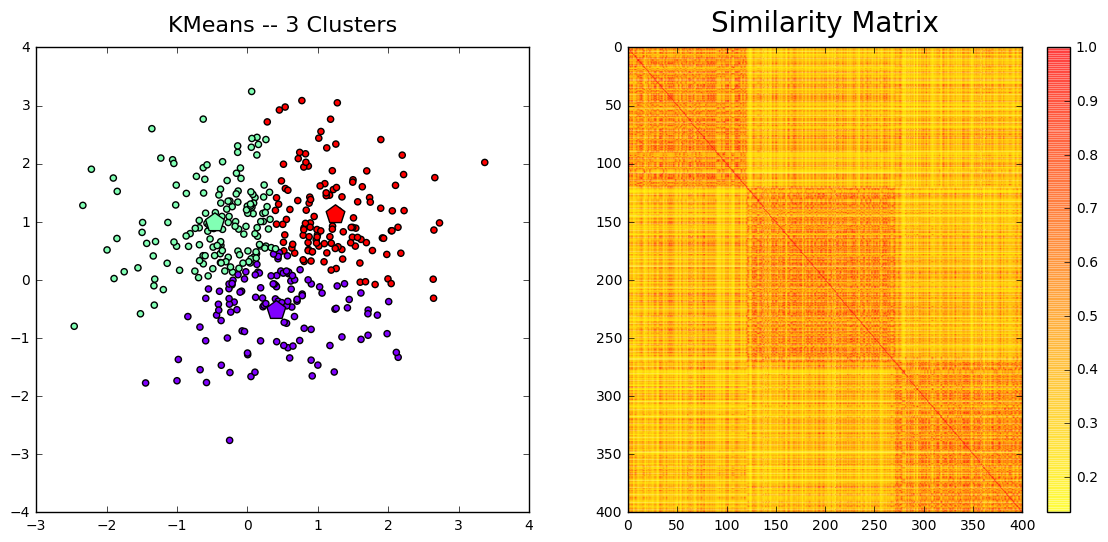

In [17]:
data = get_blobs(400,0.90)
km_clustering(data[0],3)

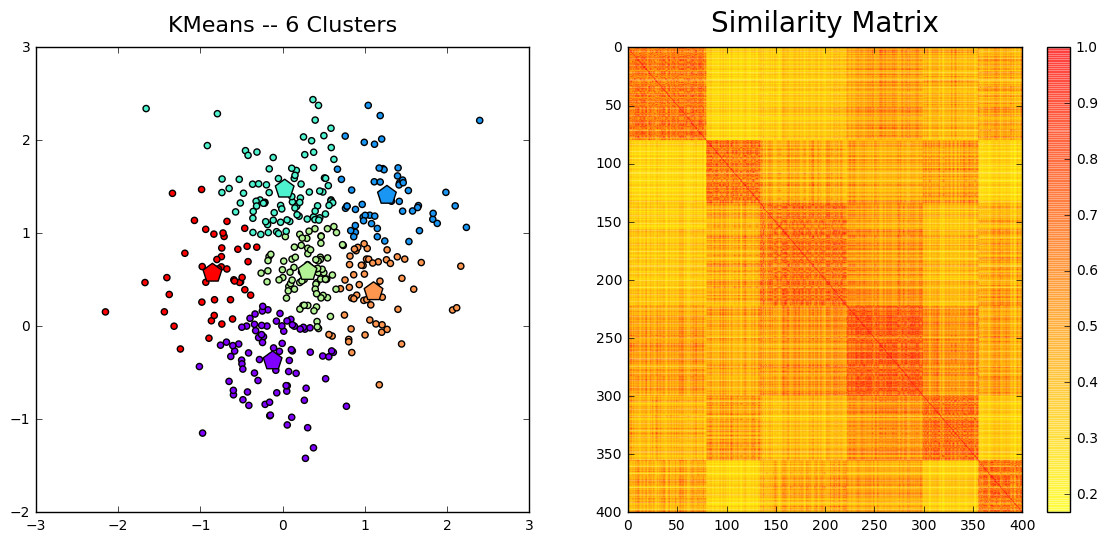

In [48]:
data = get_blobs(400,0.60)
km_clustering(data[0],6)

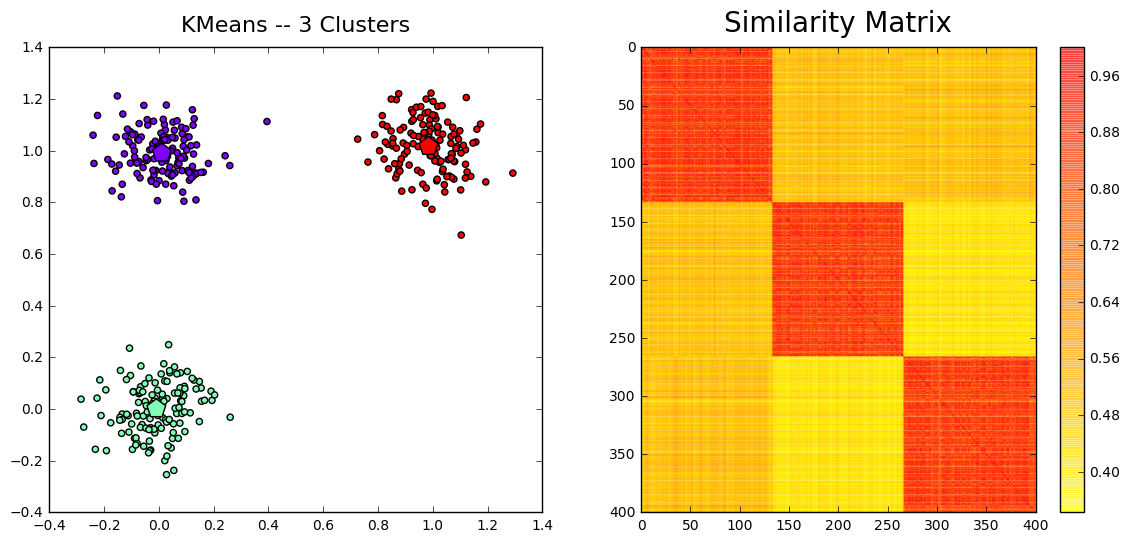

In [19]:
data = get_blobs(400,0.10)
clusters = km_clustering(data[0],3)

### KMeans Clustering 

In [3]:
def validation_plot(X,clusterer,labels,*args):
    
    unique_clusters = len(np.unique(labels))
    
    fig = plt.figure(figsize=(14,6))
    layout = (1,2)

    ax = plt.subplot2grid(layout,(0,0))
    ax.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow')
    ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],\
               c = np.arange(0,unique_clusters),cmap='rainbow',s=200,marker='p')
    
    ax.set_title('{} -- {} Clusters'.format(clusterer.__class__.__name__,unique_clusters),fontsize=16,y=1.02)
    
    ax1 = plt.subplot2grid(layout,(0,1))
    ax2 = ax1.twinx()
 
    ax1.plot(args[0],c='teal',lw=2,label='Silhouette Score')
    ax2.plot(args[1],c='purple',lw=2,label='Calinski Harzabaz Score')

    ax2.set_ylabel('Calinski Harabaz Score')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_xlabel('Score')
    
    ax1.legend(loc=(1.11,0.4),frameon=False)
    ax2.legend(loc=(1.11,0.5),frameon=False)
    
    ax1.set_title('{} -- Cluster Evaluation'.format(clusterer.__class__.__name__),fontsize=16,y=1.02)

** Iterate of 'N' clusters and compute Silhouette Score and Calinski Harabaz Score**


- Silhouette Coefficient is computed by using the mean intra-cluster distance a and b, which is the nearest cluster distance. Note, b is the distance between the sample a and the closest cluster the sample is not in.

- Equation: $ s = \frac{b-a}{max(a,b)}$


**Calinski Harzabaz**

ratio of between-cluster sum of squares (separability) to within-cluster sum of squares (compactness)


Cluster: 0 -- Calinski Harabaz: 446.748 -- Silhouette Score: 0.456
Cluster: 1 -- Calinski Harabaz: 700.389 -- Silhouette Score: 0.529
Cluster: 2 -- Calinski Harabaz: 583.416 -- Silhouette Score: 0.439
Cluster: 3 -- Calinski Harabaz: 529.574 -- Silhouette Score: 0.385
Cluster: 4 -- Calinski Harabaz: 514.195 -- Silhouette Score: 0.348
Cluster: 5 -- Calinski Harabaz: 510.644 -- Silhouette Score: 0.354
Cluster: 6 -- Calinski Harabaz: 514.146 -- Silhouette Score: 0.365
Cluster: 7 -- Calinski Harabaz: 502.826 -- Silhouette Score: 0.366


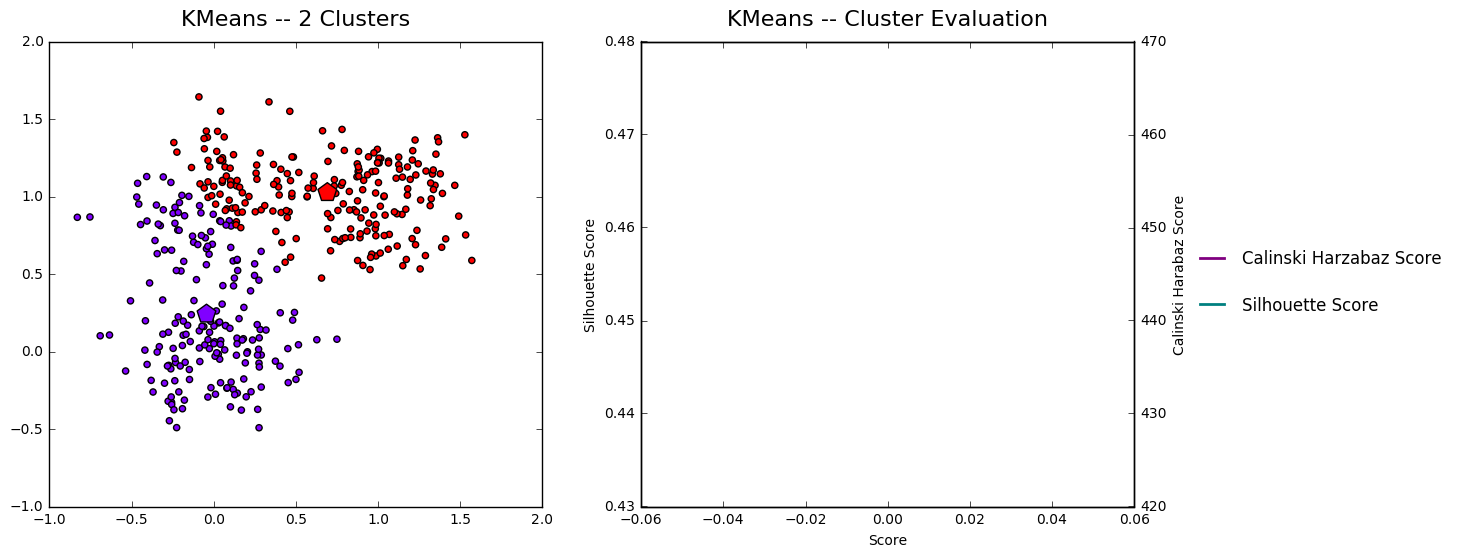

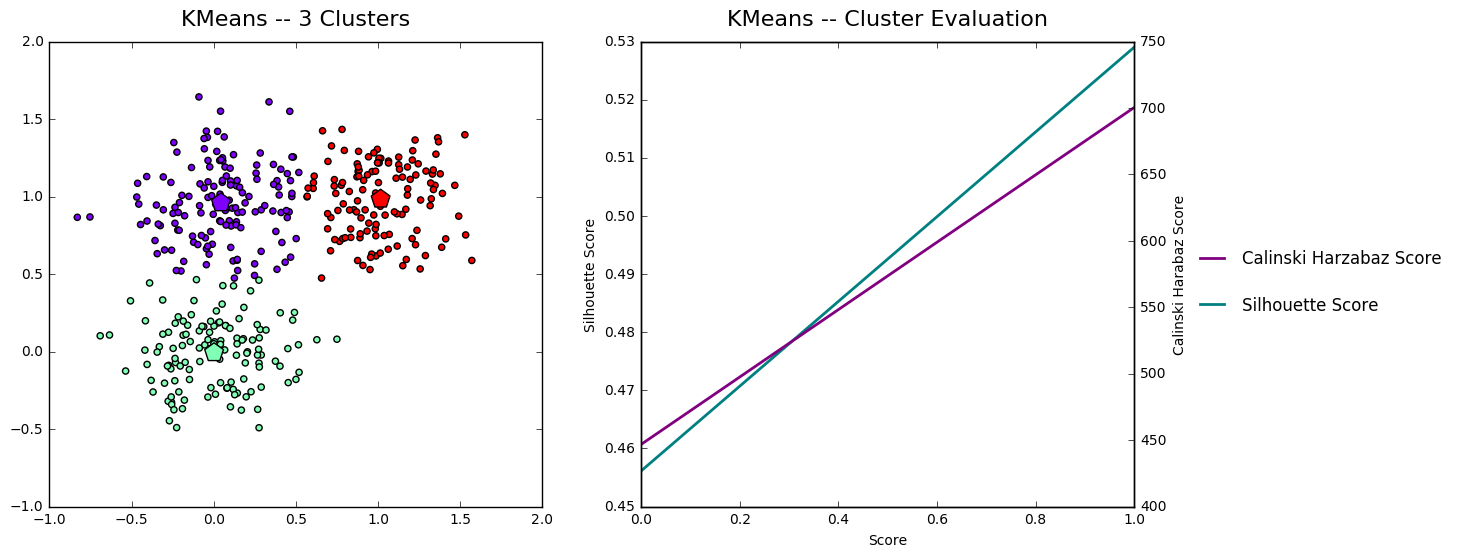

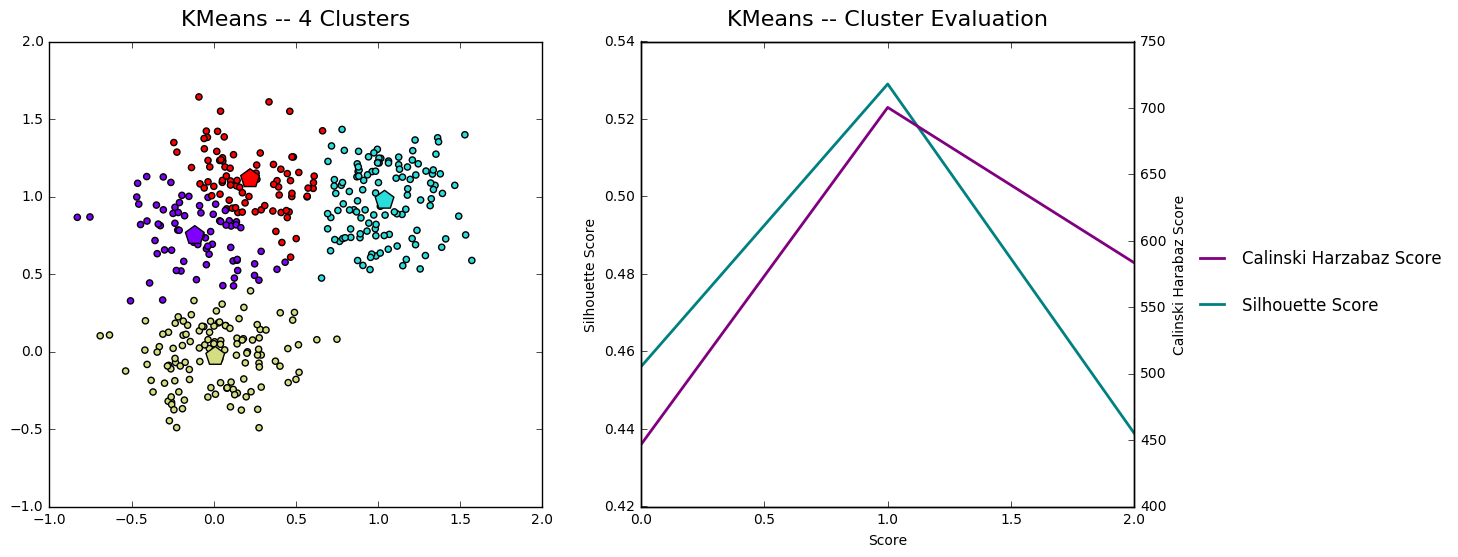

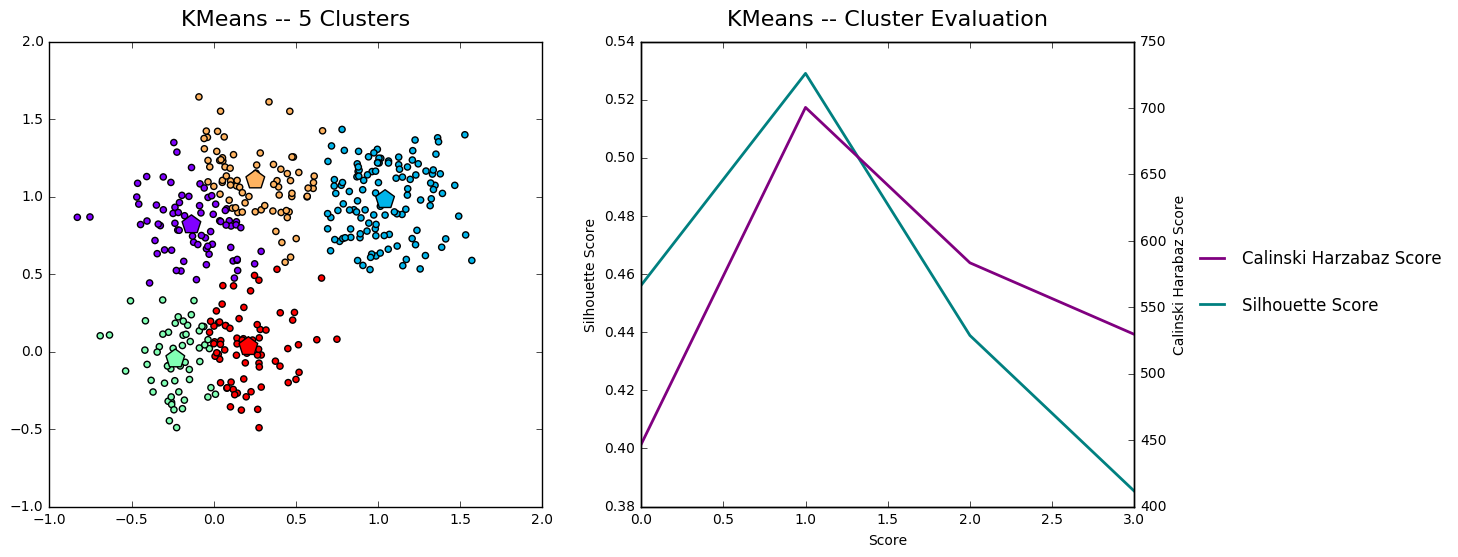

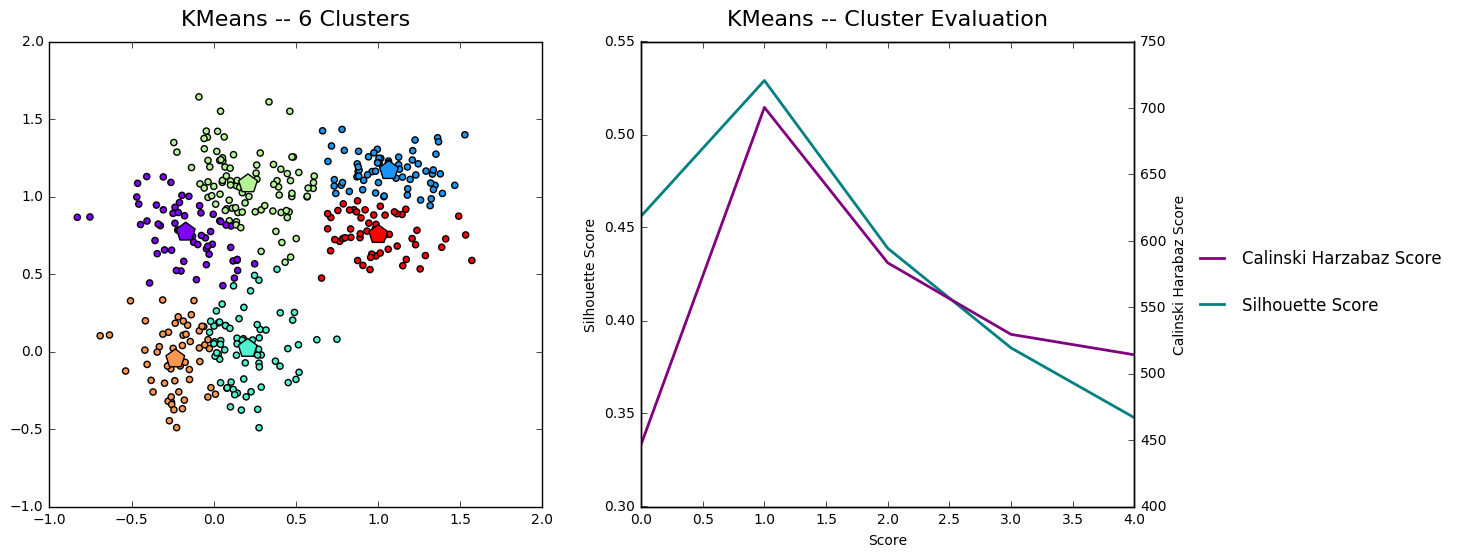

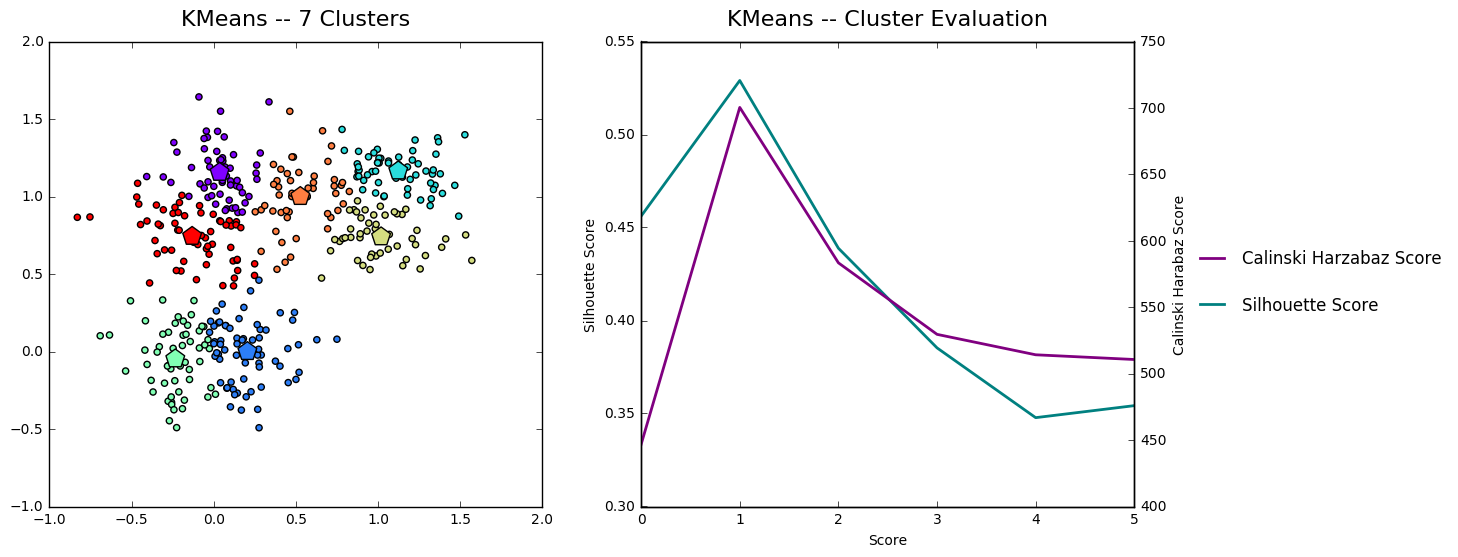

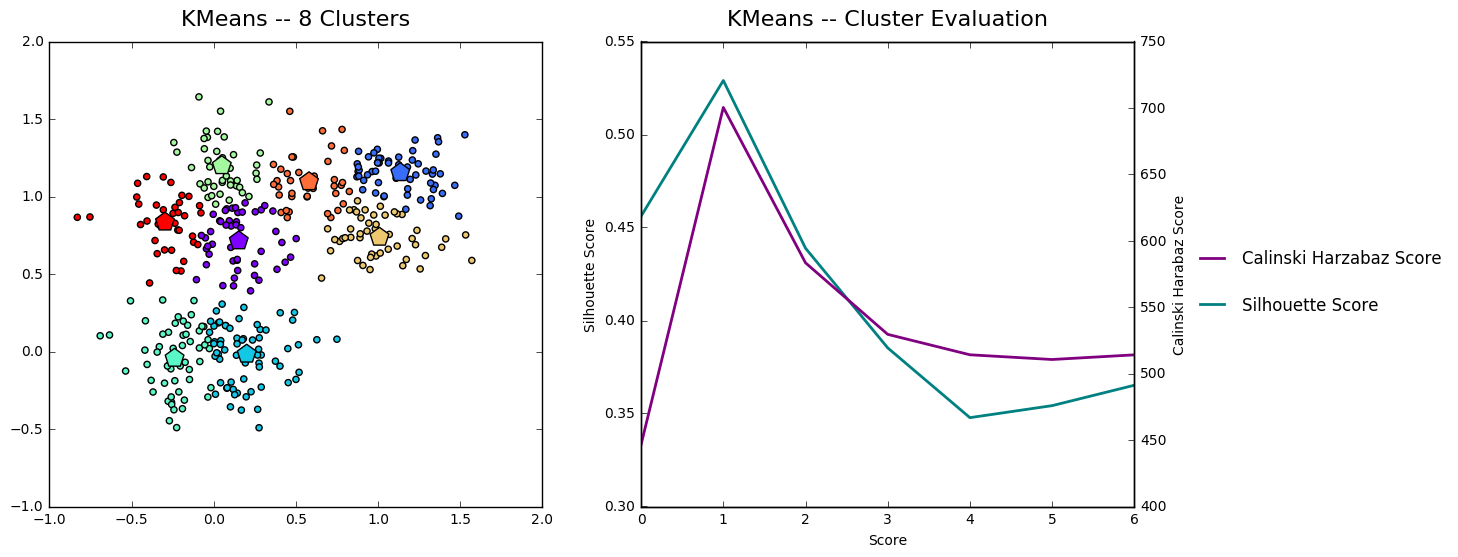

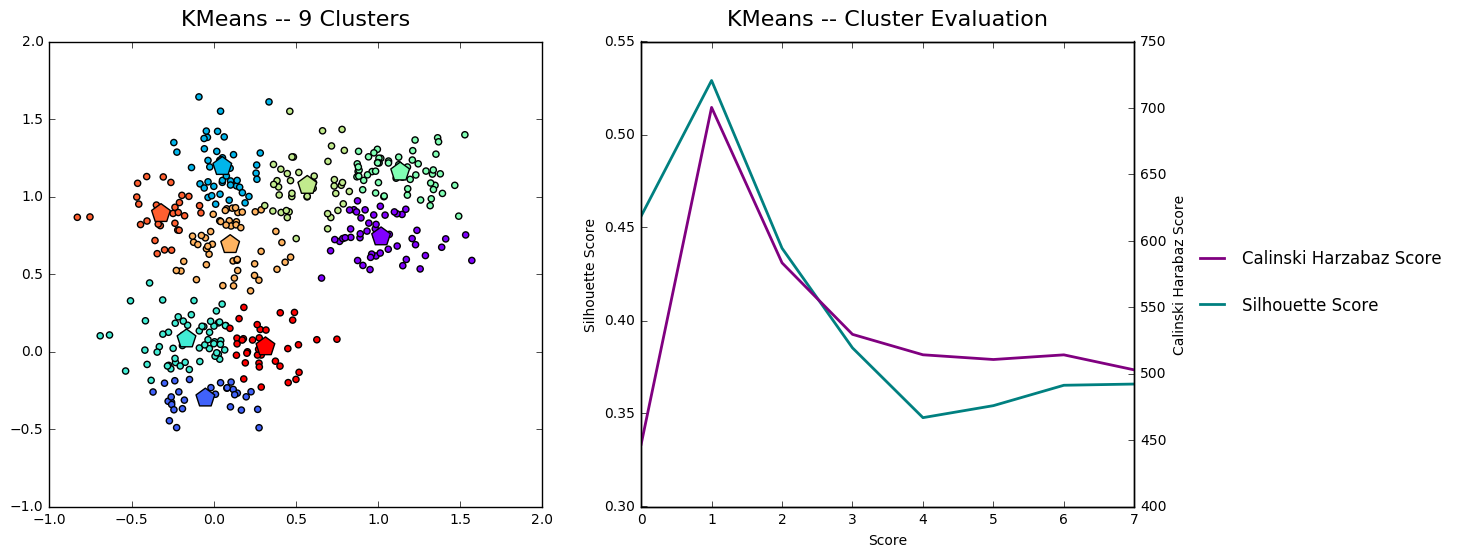

In [48]:
X = get_blobs(400,0.25)
silhouette,calinski = [],[]
for c in range(2,10):
    km = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=300, random_state=1)
    pred = km.fit_predict((X[0]))
    silhouette.append(silhouette_score(X[0],pred))
    calinski.append(calinski_harabaz_score(X[0],pred))
    validation_plot(X[0],km,km.labels_,silhouette,calinski)

for i in range(0,len(calinski)):
    print('Cluster: {0} -- Calinski Harabaz: {1:.3f} -- Silhouette Score: {2:.3f}'.format(i,calinski[i],silhouette[i]))